## DNN

### Importing necessary libraries

In [21]:
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD, Adadelta
from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from modules.helpers import load_data

### Loading the datasets

In [22]:
(train_x, train_y), (val_x, val_y), (test_x, test_y) = load_data('dnn')

### Model building

In [23]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
    Dropout(0.2),  
    Dense(64, activation='relu'),  
    Dropout(0.2),  
    Dense(32, activation='relu'),  
    Dropout(0.2),
    Dense(1, activation='sigmoid') 
])

c:\Users\ALENA MARIA THOMAS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer=Adam(), 
              loss='binary_crossentropy', 
              metrics=['accuracy']
)

In [25]:
model.fit(train_x,
          train_y,
          epochs=20, 
          validation_data=(val_x, val_y))

Epoch 1/20
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6202 - loss: 0.6668 - val_accuracy: 0.7446 - val_loss: 0.5298
Epoch 2/20
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7365 - loss: 0.5312 - val_accuracy: 0.7474 - val_loss: 0.5106
Epoch 3/20
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7426 - loss: 0.5226 - val_accuracy: 0.7494 - val_loss: 0.5146
Epoch 4/20
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7475 - loss: 0.5184 - val_accuracy: 0.7524 - val_loss: 0.5112
Epoch 5/20
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7467 - loss: 0.5179 - val_accuracy: 0.7522 - val_loss: 0.5126
Epoch 6/20
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7449 - loss: 0.5180 - val_accuracy: 0.7508 - val_loss: 0.5069
Epoch 7/20
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7515 - loss: 0.5101 - val_accuracy: 0.7537 - val_loss: 0.5089
Epoch 8/20
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7501 - loss: 0.5115 - 

### Choosing the Optimal Threshold

We check for possible values of threshold in range $[0.1, 0.9]$ with step 0.05

In [26]:
# list of possible threshold values
threshold_values = [i / 100 for i in range(10,95,5)]

# list to hold precision, recall, accuracy scores for each possible threshold value
prec_scores = []
rec_scores = []
acc_scores = []

for threshold in threshold_values:
    y_pred = (model.predict(val_x) > threshold).astype(int)
    prec_scores.append(precision_score(val_y, y_pred))
    rec_scores.append(recall_score(val_y, y_pred))
    acc_scores.append(accuracy_score(val_y, y_pred))


354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


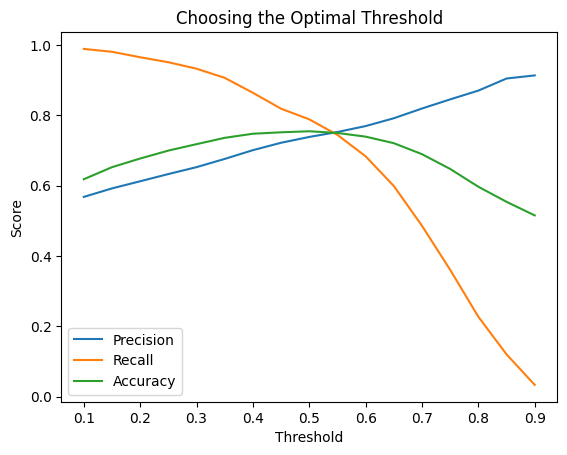

In [27]:
plt.plot(threshold_values, prec_scores, label='Precision')
plt.plot(threshold_values, rec_scores, label='Recall')
plt.plot(threshold_values, acc_scores, label='Accuracy')
plt.title('Choosing the Optimal Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

In [28]:
for i in range(len(threshold_values)):
     if acc_scores[i] > 0.7:
         print(f'- Threshold: {threshold_values[i]:.2f} | Accuracy: {acc_scores[i]:.3f} | Precision: {prec_scores[i]:.3f} | Recall: {rec_scores[i]:.3f}')

- Threshold: 0.30 | Accuracy: 0.718 | Precision: 0.652 | Recall: 0.932
- Threshold: 0.35 | Accuracy: 0.736 | Precision: 0.676 | Recall: 0.906
- Threshold: 0.40 | Accuracy: 0.747 | Precision: 0.701 | Recall: 0.864
- Threshold: 0.45 | Accuracy: 0.751 | Precision: 0.722 | Recall: 0.818
- Threshold: 0.50 | Accuracy: 0.754 | Precision: 0.738 | Recall: 0.788
- Threshold: 0.55 | Accuracy: 0.749 | Precision: 0.752 | Recall: 0.744
- Threshold: 0.60 | Accuracy: 0.739 | Precision: 0.769 | Recall: 0.683
- Threshold: 0.65 | Accuracy: 0.720 | Precision: 0.791 | Recall: 0.599


We choose the optimal threshold to be 0.55 since it has maximum accuracy and recall, while maintaining a hight precision.

In [29]:
optimal_threshold = 0.55

### Model Evaluation

In [30]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print("Testing loss:", test_loss)
print("Testing accuracy:", test_acc)

442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7556 - loss: 0.4989
Testing loss: 0.5000461935997009
Testing accuracy: 0.7546502351760864


In [31]:
y_pred = (model.predict(test_x) > optimal_threshold).astype(int)

442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Confusion Matrix:


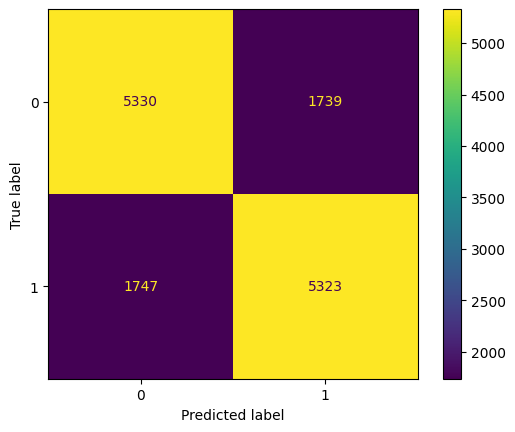

In [32]:
cm = confusion_matrix(test_y, y_pred)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [33]:
print("Classification Report:")
print(classification_report(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      7069
           1       0.75      0.75      0.75      7070

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



### Fine-tuning the model.

We apply early stopping to prevent overfitting.

In [34]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [41]:
def create_model(activation='relu', dropout_rate=0.2, optimizer='Adam', learning_rate=0.01):

    model = Sequential([
        Dense(64, activation=activation, input_shape=(51,)), # (train_x.shape[1],)
        Dropout(dropout_rate),  
        Dense(64, activation=activation),  
        Dropout(dropout_rate),  
        Dense(32, activation=activation),  
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid') 
    ])

    if optimizer == 'Adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'SGD':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'Adadelta':
        opt = Adadelta(learning_rate=learning_rate)
    
    
    model.compile(
        optimizer=opt,  
        loss='binary_crossentropy',  
        metrics=['accuracy']  
    )
    
    return model

In [36]:
model_ft = KerasClassifier(build_fn=create_model, epochs=20, batch_size=16, verbose=1)

In [42]:
param_grid = {
    'model__activation': ['relu', 'softplus', 'sigmoid', 'tanh'],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'model__optimizer': ['Adam', 'SGD', 'Adadelta'],  
    'model__learning_rate': [0.005, 0.01]  
}

In [ ]:
grid = GridSearchCV(estimator=model_ft, param_grid=param_grid, cv=3, verbose=1, n_jobs=1)  
grid_result = grid.fit(train_x, train_y)

In [ ]:
print("Best Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)